In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

# TensorFlow 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, sigmoid

# Scikit Learn 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [4]:
def missing_values(train=train, test=test):
    train_null = train.isnull().sum()
    test_null = test.isnull().sum()
    return pd.DataFrame({
        'Train': train_null, 
        'Test': test_null,
        '% Train': round(train_null/len(train), 2),
        '% Test': round(test_null/len(test), 2)
    })
missing_values(train, test)

,Train,Test,% Train,% Test
Age,177,86.0,0.20,0.21
Cabin,687,327.0,0.77,0.78
Embarked,2,0.0,0.00,0.00
Fare,0,1.0,0.00,0.00
Name,0,0.0,0.00,0.00
Parch,0,0.0,0.00,0.00
PassengerId,0,0.0,0.00,0.00
Pclass,0,0.0,0.00,0.00
Sex,0,0.0,0.00,0.00
SibSp,0,0.0,0.00,0.00


In [5]:
print(f'Train Survived: {train.Survived.unique()}')
print(f'Τest Survived: {gender_submission.Survived.unique()}')

Train Survived: [0 1]
Τest Survived: [0 1]


In [6]:
train.Age = train.Age.apply(lambda age: math.ceil(train.Age.mean()) if pd.isna(age) else age).astype(int)
test.Age = test.Age.apply(lambda age: math.ceil(test.Age.mean()) if pd.isna(age) else age).astype(int)

In [7]:
print(train.duplicated().any())
print(test.duplicated().any())

False
False


In [8]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train.Embarked.where(pd.isna(train.Embarked)==False, other='S', inplace=True) 

In [10]:
test.Fare.where(pd.isna(test.Fare)==False, other=test.Fare.mean(), inplace=True) 

In [11]:
missing_values(train, test)

,Train,Test,% Train,% Test
Age,0,0.0,0.00,0.00
Cabin,687,327.0,0.77,0.78
Embarked,0,0.0,0.00,0.00
Fare,0,0.0,0.00,0.00
Name,0,0.0,0.00,0.00
Parch,0,0.0,0.00,0.00
PassengerId,0,0.0,0.00,0.00
Pclass,0,0.0,0.00,0.00
Sex,0,0.0,0.00,0.00
SibSp,0,0.0,0.00,0.00


In [12]:
columns_to_drop = ['Name', 'Cabin', 'Ticket', 'PassengerId']
for column in columns_to_drop:
    train.drop(column, axis=1, inplace=True)
    test.drop(column, axis=1, inplace=True)

In [13]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [14]:
numerical_features = ['Fare', 'Age']
scaler = StandardScaler(0, 1)

for column in numerical_features:
    train[column] = scaler.fit_transform(pd.DataFrame(train[column]))
    test[column] = scaler.fit_transform(pd.DataFrame(test[column]))

In [15]:
x_train = train.drop('Survived', axis=1).values
y_train = train.Survived.values
x_test = test.values
y_test = gender_submission.Survived.values
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((891, 10), (891,), (418, 10), (418,))

In [16]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(x_train, y_train)
logistic_regression_predictions = logistic_regression.predict(x_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)
logistic_regression_score = round(accuracy_score(y_test, logistic_regression_predictions), 2)
print(f'Accuracy score: {logistic_regression_score * 100}%')

Accuracy score: 94.0%


In [17]:
# KNeighbors Classifier
kneighbors = KNeighborsClassifier()
kneighbors.fit(x_train, y_train)
kneighbors_predictions = kneighbors.predict(x_test)
kneighbors_confusion_matrix = confusion_matrix(y_test, kneighbors_predictions)
kneighbors_score = round(accuracy_score(y_test, kneighbors_predictions), 2)
print(f'Accuracy score: {kneighbors_score * 100}%')

Accuracy score: 84.0%


In [18]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train)
sgd_predictions = sgd.predict(x_test)
sgd_confusion_matrix = confusion_matrix(y_test, sgd_predictions)
sgd_score = round(accuracy_score(y_test, sgd_predictions), 2)
print(f'Accuracy score: {sgd_score * 100}%')

Accuracy score: 95.0%


In [19]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)
decision_tree_predictions = decision_tree.predict(x_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)
decision_tree_score = round(accuracy_score(y_test, decision_tree_predictions), 2)
print(f'Accuracy score: {decision_tree_score * 100}%')

Accuracy score: 79.0%


In [20]:
# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)
random_forest_predictions = random_forest.predict(x_test)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)
random_forest_score = round(accuracy_score(y_test, random_forest_predictions), 2)
print(f'Accuracy score: {random_forest_score * 100}%')

Accuracy score: 83.0%


In [21]:
# C-Support Vector Classification
svc = SVC(kernel='linear', random_state=42)
svc.fit(x_train, y_train)
svc_predictions = svc.predict(x_test)
svc_confusion_matrix = confusion_matrix(y_test, svc_predictions)
svc_score = round(accuracy_score(y_test, svc_predictions), 2)
print(f'Accuracy score: {svc_score * 100}%')

Accuracy score: 100.0%


In [22]:
# Neural Network
model = Sequential([
    Dense(16, activation=relu, input_shape=(10,)),
    Dense(32, activation=relu),
    Dense(1, activation=sigmoid)
])

model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________
14/14 [==============================] - 0s 538us/step - loss: 0.2944 - accuracy: 0.9378


[0.2943561375141144, 0.9377990365028381]

In [23]:
neural_network_predictions = model.predict(x_test)
neural_network_predictions = [1 if x > 0.5 else 0 for x in neural_network_predictions]
neural_network_score = round(accuracy_score(y_test, neural_network_predictions), 2)
neural_network_confusion_matrix = confusion_matrix(y_test, neural_network_predictions)
print(f'Accuracy score: {neural_network_score * 100}%')

Accuracy score: 94.0%


In [24]:
classification_models = {
    "Predictions": {
        "Logistic Regression" : logistic_regression_predictions,
        "KNeighbors": kneighbors_predictions,
        "Stochastic Gradient Descent" : sgd_predictions,
        "Decision Tree" : decision_tree_predictions,
        "Random Forest": random_forest_predictions,
        "Support Vector Machine": svc_predictions,
        "Neural Network" : neural_network_predictions
    },
    "Confusion Matrix": {
        "Logistic Regression" : logistic_regression_confusion_matrix,
        "KNeighbors": kneighbors_confusion_matrix,
        "Stochastic Gradient Descent" : sgd_confusion_matrix,
        "Decision Tree" : decision_tree_confusion_matrix,
        "Random Forest": random_forest_confusion_matrix,
        "Support Vector Machine": svc_confusion_matrix,
        "Neural Network" : neural_network_confusion_matrix
    },
    "Accuracy Score": {
        "Logistic Regression" : logistic_regression_score,
        "KNeighbors": kneighbors_score,
        "Stochastic Gradient Descent" : sgd_score,
        "Decision Tree" : decision_tree_score,
        "Random Forest": random_forest_score,
        "Support Vector Machine": svc_score,
        "Neural Network" : neural_network_score
    }
}

In [25]:
all_accuracy_scores = pd.DataFrame(
    {"% Accuracy Score": [score * 100 for score in list(classification_models["Accuracy Score"].values())]}, 
    index=classification_models["Accuracy Score"].keys()
)
all_accuracy_scores

,% Accuracy Score
Logistic Regression,94.0
KNeighbors,84.0
Stochastic Gradient Descent,95.0
Decision Tree,79.0
Random Forest,83.0
Support Vector Machine,100.0
Neural Network,94.0


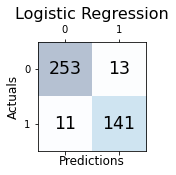

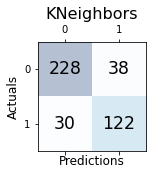

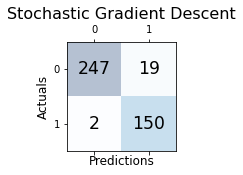

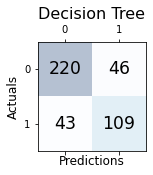

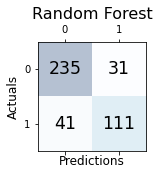

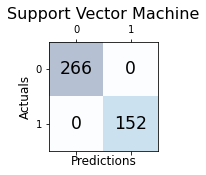

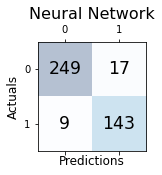

In [26]:
for model, conf_matrix in (list(classification_models["Confusion Matrix"].items())):
    fig, ax = plt.subplots(figsize=(4, 2))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=12)
    plt.ylabel('Actuals', fontsize=12)
    plt.title(f'{model}', fontsize=16)
    plt.show()

In [27]:
all_predictions = pd.DataFrame({
    'PassengerId' : gender_submission.PassengerId,
    'Survived': y_test,
    'Logistic Regression' : logistic_regression_predictions,
    'Stochastic Gradient Descent' : sgd_predictions,
    'Decision Tree' : decision_tree_predictions,
    'Random Forest' : random_forest_predictions,
    'KNeighbors' : kneighbors_predictions, 
    'C-Support Vector' : svc_predictions,
    "Neural Network" : neural_network_predictions
})

all_predictions.head(20)

,PassengerId,Survived,Logistic Regression,Stochastic Gradient Descent,Decision Tree,Random Forest,KNeighbors,C-Support Vector,Neural Network
0,892,0,0,0,0,0,0,0,0
1,893,1,0,1,0,0,0,1,0
2,894,0,0,0,1,0,0,0,0
3,895,0,0,0,0,0,0,0,0
4,896,1,1,1,1,1,0,1,1
5,897,0,0,0,1,0,0,0,0
6,898,1,1,1,0,0,1,1,1
7,899,0,0,0,0,0,0,0,0
8,900,1,1,1,0,1,1,1,1
9,901,0,0,0,0,0,0,0,0


In [28]:
output = pd.DataFrame({'PassengerId': gender_submission.PassengerId,
                       'Survived': svc_predictions})
output.to_csv('submission.csv', index=False)